In [ ]:
import pandas as pd
from matplotlib import pylab
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

params = {'xtick.labelsize': 18,
 'ytick.labelsize': 18,
 'axes.titlesize' : 22,
 'axes.labelsize' : 20,
 'legend.fontsize': 18,
 'legend.title_fontsize': 22,
 'figure.titlesize': 24
 }
pylab.rcParams.update(params)

In [ ]:
from sklearn.model_selection import train_test_split

#Loadig the data into a DF
df = pd.read_csv("./HW3_data.csv")

#Creating the test/train split
train_size = 0.8
test_size = 1 - train_size
train, test = train_test_split(df, test_size=test_size, train_size=train_size, random_state=51+14, shuffle=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd


def prepare_data(training_data, new_data):
    test = new_data.copy()
    train = training_data.copy()

    # ----- blood_type -> blood types groups -----
    # group_1_blood_type
    train.insert(len(train.columns) - 2, "group_1_blood_type", train['blood_type'].isin(['A+', 'A-']))
    train['group_1_blood_type'] = train['group_1_blood_type'].replace({True: 1, False: 0})
    test.insert(len(test.columns) - 2, "group_1_blood_type", test['blood_type'].isin(['A+', 'A-']))
    test['group_1_blood_type'] = test['group_1_blood_type'].replace({True: 1, False: 0})

    # group_2_blood_type
    train.insert(len(train.columns) - 2, "group_2_blood_type", train['blood_type'].isin(['AB+', 'AB-', 'B+', 'B-']))
    train['group_2_blood_type'] = train['group_2_blood_type'].replace({True: 1, False: 0})
    test.insert(len(test.columns) - 2, "group_2_blood_type", test['blood_type'].isin(['AB+', 'AB-', 'B+', 'B-']))
    test['group_2_blood_type'] = test['group_2_blood_type'].replace({True: 1, False: 0})

    # group_3_blood_type
    train.insert(len(train.columns) - 2, "group_3_blood_type", train['blood_type'].isin(['O+', 'O-']))
    train['group_3_blood_type'] = train['group_3_blood_type'].replace({True: 1, False: 0})
    test.insert(len(test.columns) - 2, "group_3_blood_type", test['blood_type'].isin(['O+', 'O-']))
    test['group_3_blood_type'] = test['group_3_blood_type'].replace({True: 1, False: 0})

    # drop blood_type
    train = train.drop('blood_type', axis=1)
    test = test.drop('blood_type', axis=1)

    # ----- symptoms OHE -----
    train['symptoms'] = train['symptoms'].fillna("")
    test['symptoms'] = test['symptoms'].fillna("")

    # transform symptoms feature into 5 binary features
    train.insert(len(train.columns) - 2, "sore_throat", train['symptoms'].str.contains("sore_throat"))
    train['sore_throat'] = train['sore_throat'].replace({True: 1, False: 0})
    train.insert(len(train.columns) - 2, "cough", train['symptoms'].str.contains("cough"))
    train['cough'] = train['cough'].replace({True: 1, False: 0})
    train.insert(len(train.columns) - 2, "shortness_of_breath", train['symptoms'].str.contains("shortness_of_breath"))
    train['shortness_of_breath'] = train['shortness_of_breath'].replace({True: 1, False: 0})
    train.insert(len(train.columns) - 2, "fever", train['symptoms'].str.contains("fever"))
    train['fever'] = train['fever'].replace({True: 1, False: 0})
    train.insert(len(train.columns) - 2, "smell_loss", train['symptoms'].str.contains("smell_loss"))
    train['smell_loss'] = train['smell_loss'].replace({True: 1, False: 0})
    train = train.drop('symptoms', axis=1)

    # same transformation for test data
    test.insert(len(test.columns) - 2, "sore_throat", test['symptoms'].str.contains("sore_throat"))
    test['sore_throat'] = test['sore_throat'].replace({True: 1, False: 0})
    test.insert(len(test.columns) - 2, "cough", test['symptoms'].str.contains("cough"))
    test['cough'] = test['cough'].replace({True: 1, False: 0})
    test.insert(len(test.columns) - 2, "shortness_of_breath", test['symptoms'].str.contains("shortness_of_breath"))
    test['shortness_of_breath'] = test['shortness_of_breath'].replace({True: 1, False: 0})
    test.insert(len(test.columns) - 2, "fever", test['symptoms'].str.contains("fever"))
    test['fever'] = test['fever'].replace({True: 1, False: 0})
    test.insert(len(test.columns) - 2, "smell_loss", test['symptoms'].str.contains("smell_loss"))
    test['smell_loss'] = test['smell_loss'].replace({True: 1, False: 0})
    test = test.drop('symptoms', axis=1)

    # ----- sex -> 0 for M, 1 for F -----
    train['sex'] = train['sex'].replace({'M': 0, 'F': 1})
    test['sex'] = test['sex'].replace({'M': 0, 'F': 1})

    # ----- current_location -> coordiante_X, coordiante_Y -----
    train['current_location'] = train['current_location'].str.replace(r"[() ']", '')
    train[['coordinate_X', 'coordinate_Y']] = train['current_location'].str.split(',', expand=True)
    train['coordinate_X'] = train['coordinate_X'].apply(float)
    train['coordinate_Y'] = train['coordinate_Y'].apply(float)
    train = train.drop('current_location', axis=1)

    test['current_location'] = test['current_location'].str.replace(r"[() ']", '')
    test[['coordinate_X', 'coordinate_Y']] = test['current_location'].str.split(',', expand=True)
    test['coordinate_X'] = test['coordinate_X'].apply(float)
    test['coordinate_Y'] = test['coordinate_Y'].apply(float)
    test = test.drop('current_location', axis=1)

    # ----- pcr_date -> time since epoch (timestamp) -----
    train['pcr_date_timestamp'] = pd.to_datetime(train['pcr_date'], format="%d-%m-%y")
    train['pcr_date_timestamp'] = train['pcr_date_timestamp'].apply(lambda x: x.timestamp())
    train['pcr_date_timestamp'] = train['pcr_date_timestamp'].astype(int)
    train = train.drop('pcr_date', axis=1)

    test['pcr_date_timestamp'] = pd.to_datetime(test['pcr_date'], format="%d-%m-%y")
    test['pcr_date_timestamp'] = test['pcr_date_timestamp'].apply(lambda x: x.timestamp())
    test['pcr_date_timestamp'] = test['pcr_date_timestamp'].astype(int)
    test = test.drop('pcr_date', axis=1)

    # ----- Scaling -----
    test = test.drop('patient_id', axis=1).copy()
    train = train.drop('patient_id', axis=1).copy()

    test_normalized = test.copy()

    standard_cols = ['age','weight','num_of_siblings','happiness_score','household_income',
                 'conversations_per_day','sugar_levels','sport_activity','pcr_date_timestamp']

    minmax_cols = ['sex','group_1_blood_type','group_2_blood_type','group_3_blood_type','sore_throat','cough',
               'shortness_of_breath','fever','smell_loss','coordinate_X','coordinate_Y'] + train.filter(like='PCR').columns.tolist()

    standard_scaler = StandardScaler()
    minmax_scaler = MinMaxScaler(feature_range=(-1, 1))

    standard_scaler.fit(train[standard_cols])
    test_normalized[standard_cols] = standard_scaler.transform(test[standard_cols])

    minmax_scaler.fit(train[minmax_cols])
    test_normalized[minmax_cols] = minmax_scaler.transform(test[minmax_cols])

    return test_normalized


df = pd.read_csv("./HW3_data.csv")
train_size = 0.8
test_size = 1 - train_size
train_df, test_df = train_test_split(df, test_size=test_size, train_size=train_size,
                                      random_state=51 + 14, shuffle=True)

# Prepare training set according to itself
train_df_prepared = prepare_data(train_df, train_df)
# Prepare test set according to the raw training set
test_df_prepared = prepare_data(train_df, test_df)

# save CSV
train_df_prepared.to_csv("/content/train_preprocessed.csv")
test_df_prepared.to_csv("/content/test_preprocessed.csv")


<ipython-input-4-ef317d84ccd5>:68: FutureWarning: The default value of regex will change from True to False in a future version.
  train['current_location'] = train['current_location'].str.replace(r"[() ']", '')
<ipython-input-4-ef317d84ccd5>:74: FutureWarning: The default value of regex will change from True to False in a future version.
  test['current_location'] = test['current_location'].str.replace(r"[() ']", '')
<ipython-input-4-ef317d84ccd5>:68: FutureWarning: The default value of regex will change from True to False in a future version.
  train['current_location'] = train['current_location'].str.replace(r"[() ']", '')
<ipython-input-4-ef317d84ccd5>:74: FutureWarning: The default value of regex will change from True to False in a future version.
  test['current_location'] = test['current_location'].str.replace(r"[() ']", '')


In [ ]:
# Tasks before Q2
new_train, new_val = train_test_split(train_df_prepared, test_size=0.2, train_size=0.8, random_state=51 + 14, shuffle=True)

In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np

class LinearRegressor(BaseEstimator, RegressorMixin):
    """
    Custom linear regression model
    """
    def __init__(self, lr: float = 1e-5):
        """
        Initialize an instance of this class.
        ** Do not edit this method **

        :param lr: the SGD learning rate (step size)
        """
        self.lr = lr
        self.batch_size = 32
        self.w = None
        self.b = 0.0

    # Initialize a random weight vector
    def init_solution(self, n_features: int):
        """
        Randomize an initial solution (weight vector)
        ** Do not edit this method **

        :param n_features:
        """
        self.w = np.zeros(n_features)
        self.b = 0.0

    @staticmethod
    def loss(w, b: float, X, y):
        """
        Compute the MSE objective loss.

        :param w: weight vector for linear regression; array of shape (n_features,)
        :param b: bias scalar for linear regression
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: the linear regression objective loss (float scalar)
        """

        m = np.shape(y)[0]
        b_vec = np.ones(m) * b
        Xw = np.matmul(X,w)
        norm = np.linalg.norm(Xw + b_vec - y, ord=2)
        loss = (1 / m) * (norm ** 2)
        return loss

    @staticmethod
    def gradient(w, b: float, X, y):
        """
        Compute the (analytical) linear regression objective gradient.

        :param w: weight vector for linear regression; array of shape (n_features,)
        :param b: bias scalar for linear regression
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: a tuple with (the gradient of the weights, the gradient of the bias)
        """

        m = np.shape(y)[0]
        b_vec = np.ones(m) * b
        Xw = np.matmul(X,w) - y
        g_w = (2 / m) * np.matmul(X.T, Xw + b_vec)
        g_b = ((2 / m) * np.sum(Xw)) + (2 * b)
        return g_w, g_b

    def fit_with_logs(self, X, y, max_iter: int = 1000, keep_losses: bool = True,
                      X_val = None, y_val = None):
        """
        Fit the model according to the given training data.

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets; array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        :param keep_losses: should compute the train & val losses during training?
        :param X_val: validation samples to compute the loss for (for logs only)
        :param y_val: validation labels to compute the loss for (for logs only)
        :return: training and validation losses during training
        """
        # Initialize learned parameters
        self.init_solution(X.shape[1])

        train_losses = []
        val_losses = []

        if keep_losses:
            train_losses.append(self.loss(self.w, self.b, X, y))
            val_losses.append(self.loss(self.w, self.b, X_val, y_val))

        # Iterate over batches (SGD)
        for itr in range(0, max_iter):
            start_idx = (itr * self.batch_size) % X.shape[0]
            end_idx = min(X.shape[0], start_idx + self.batch_size)
            batch_X = X[start_idx: end_idx]
            batch_y = y[start_idx: end_idx]

            g_w, g_b = self.gradient(self.w, self.b, batch_X, batch_y)

            # Perform a gradient step
            self.w = self.w - (g_w * self.lr)
            self.b = self.b - (g_b * self.lr)

            if keep_losses:
                train_losses.append(self.loss(self.w, self.b, X, y))
                val_losses.append(self.loss(self.w, self.b,  X_val, y_val))

        return train_losses, val_losses

    def fit(self, X, y, max_iter: int = 1000):
        """
        Fit the model according to the given training data.
        ** Do not edit this method **

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets; array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        """
        self.fit_with_logs(X, y, max_iter=max_iter, keep_losses=False)

        return self

    def predict(self, X):
        """
        Regress labels on samples in X.

        :param X: samples for prediction; array of shape (n_samples, n_features)
        :return: Predicted continuous labels for samples in X; array of shape (n_samples,)
        """

        y_pred = np.matmul(X, self.w) + self.b
        return y_pred

In [ ]:
def numerical_subgradient(w, b, X, y, delta=1e-4):
    w_ = w.copy()
    g_w = np.zeros_like(w_)
    orig_objective = LinearRegressor.loss(w_, b, X, y)
    for i in range(g_w.shape[0]):
        w_[i] += delta
        perturbed_objective = LinearRegressor.loss(w_, b, X, y)
        w_[i] -= delta
        g_w[i] = (perturbed_objective - orig_objective) / delta

    g_b = (LinearRegressor.loss(w_, b + delta, X, y) - orig_objective) / delta
    return g_w, g_b


def compare_gradients(X, y, deltas, C=1, REPEATS=10, figsize=(10, 6)):
    residual_means_w = []
    residual_means_b = []

    for delta in deltas:
        residuals_w = []
        residuals_b = []

        for _ in range(REPEATS):
            # Randomize vectors in which the gradient is computed
            w = np.random.randn(X.shape[1])
            b = np.random.randn(1)

            # Compute the two types of gradients
            analytic_grad_w, analytic_grad_b = LinearRegressor.gradient(w, b, X, y)

            numeric_grad_w, numeric_grad_b = numerical_subgradient(w, b, X, y, delta=delta)

            residual_w = np.linalg.norm(numeric_grad_w - analytic_grad_w)
            residuals_w.append(residual_w)

            residual_b = np.linalg.norm(numeric_grad_b - analytic_grad_b)
            residuals_b.append(residual_b)

        residual_means_w.append(np.mean(residuals_w))
        residual_means_b.append(np.mean(residuals_b))

    fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(16, 8))
    plt.suptitle('Residuals of analytical and numerical gradients',
                 fontsize=22, fontweight="bold")
    axs[0].set_title(r'Residuals of $\nabla_{w}L\left(w,b\right)$')
    axs[1].set_title(r'Residuals of $\frac{\partial}{\partial{b}}L\left(w,b\right)$')
    axs[0].plot(deltas, residual_means_w, linewidth=3)
    axs[1].plot(deltas, residual_means_b, linewidth=3)
    axs[0].set_yscale('log')
    axs[0].set_xscale('log')
    axs[1].set_yscale('log')
    axs[1].set_xscale('log')
    axs[0].set_xlabel('$\delta_w$', fontsize=18)
    axs[1].set_xlabel('$\delta_b$', fontsize=18)
    axs[0].set_ylabel(r'$\left\Vert \nabla_{w}L\left(w,b\right) - u_{\delta_w} \left(w,b\right)\right\Vert$',
                      fontsize=18)
    axs[1].set_ylabel(
        r'$\left\Vert \frac{\partial}{\partial{b}}L\left(w,b\right) - u_{\delta_b} \left(w,b\right)\right\Vert$',
        fontsize=18)

    axs[0].grid(alpha=0.5)
    axs[1].grid(alpha=0.5)
    plt.show()


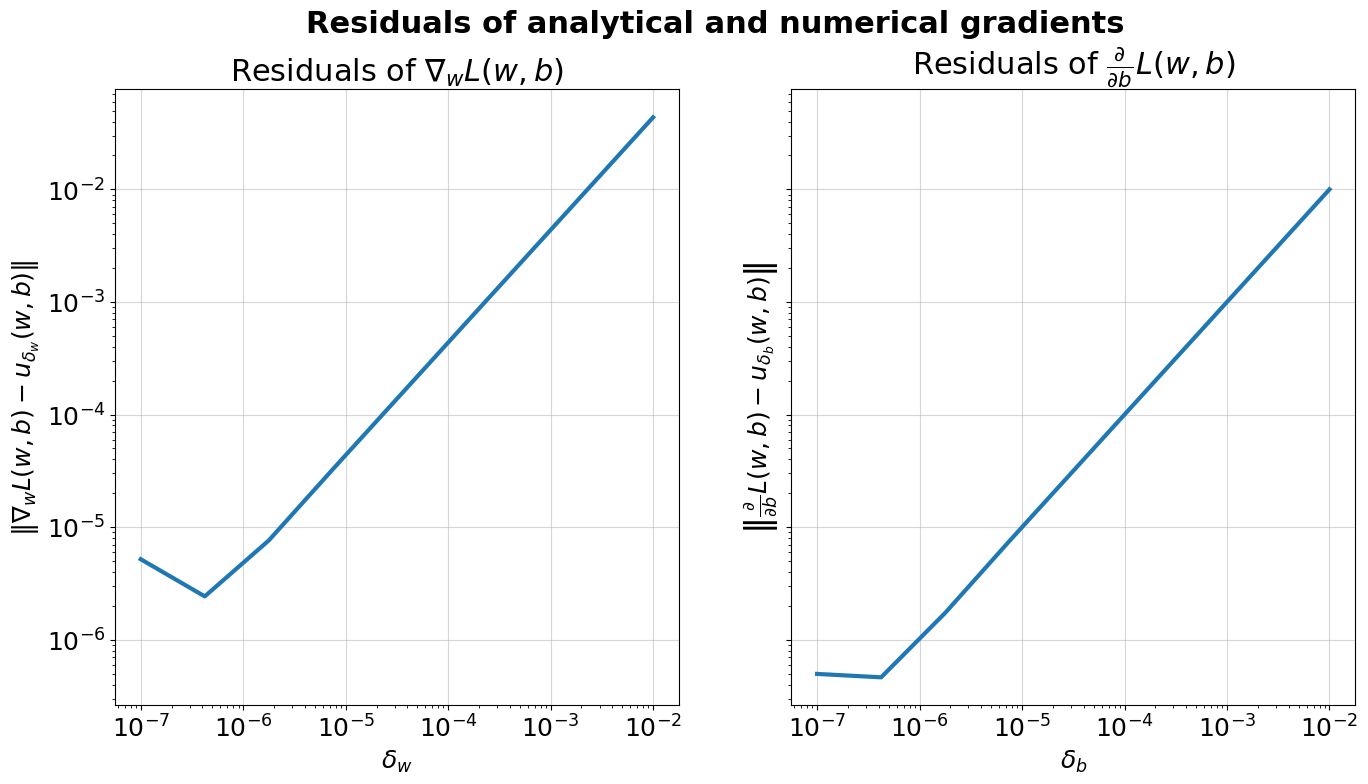

In [ ]:
# Q2
new_X_train = new_train.drop('contamination_level', axis=1)
new_X_train = new_X_train.to_numpy()
new_Y_train = new_train['contamination_level']
new_Y_train = new_Y_train.to_numpy()
compare_gradients(new_X_train, new_Y_train, deltas=np.logspace(-7, -2, 9))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def test_lr(X_train, y_train, X_val, y_val, title:str, max_iter = 1500):
  lr_list = np.logspace(-9, -1, 9)

  fig, axs = plt.subplots(3, 3, sharey=True, figsize=(20, 12))
  plt.suptitle(title, fontsize=32)
  plt.tight_layout()
  fig.subplots_adjust(hspace=0.5, top=0.9)

  axs = np.ravel(axs)
  for i, lr in enumerate(lr_list):
    cur_linear_reggressor = LinearRegressor(lr)
    train_losses, val_losses = cur_linear_reggressor.fit_with_logs(X_train, y_train, keep_losses=True, X_val=X_val, y_val=y_val, max_iter = max_iter)
    print('lr size = '+str(lr)+', Best train loss = '+str(min(train_losses))+', Best validation loss = '+str(min(val_losses)))

    iterations = np.arange(max_iter + 1)
    axs[i].semilogy(iterations, train_losses, label="Train")
    axs[i].semilogy(iterations, val_losses, label="Validation")
    axs[i].grid(alpha=0.5)
    axs[i].legend()
    axs[i].set_title('lr = '+str(lr))
    axs[i].set_xlabel('iteration')
    axs[i].set_ylabel('MSE')

lr size = 1e-09, Best train loss = 393.6337427140203, Best validation loss = 453.4558651825001
lr size = 1e-08, Best train loss = 393.56912888632877, Best validation loss = 453.38532318159577
lr size = 1e-07, Best train loss = 392.92384917155556, Best validation loss = 452.68078248533516
lr size = 1e-06, Best train loss = 386.556133000103, Best validation loss = 445.72254085599286
lr size = 1e-05, Best train loss = 330.6621784990335, Best validation loss = 384.13950321684126
lr size = 0.0001, Best train loss = 140.9308170728574, Best validation loss = 158.72152209966652
lr size = 0.001, Best train loss = 95.24576412387488, Best validation loss = 99.7245211510043
lr size = 0.01, Best train loss = 84.55239593609707, Best validation loss = 95.65070472286189
lr size = 0.1, Best train loss = 86.70536380682863, Best validation loss = 96.57712934405322


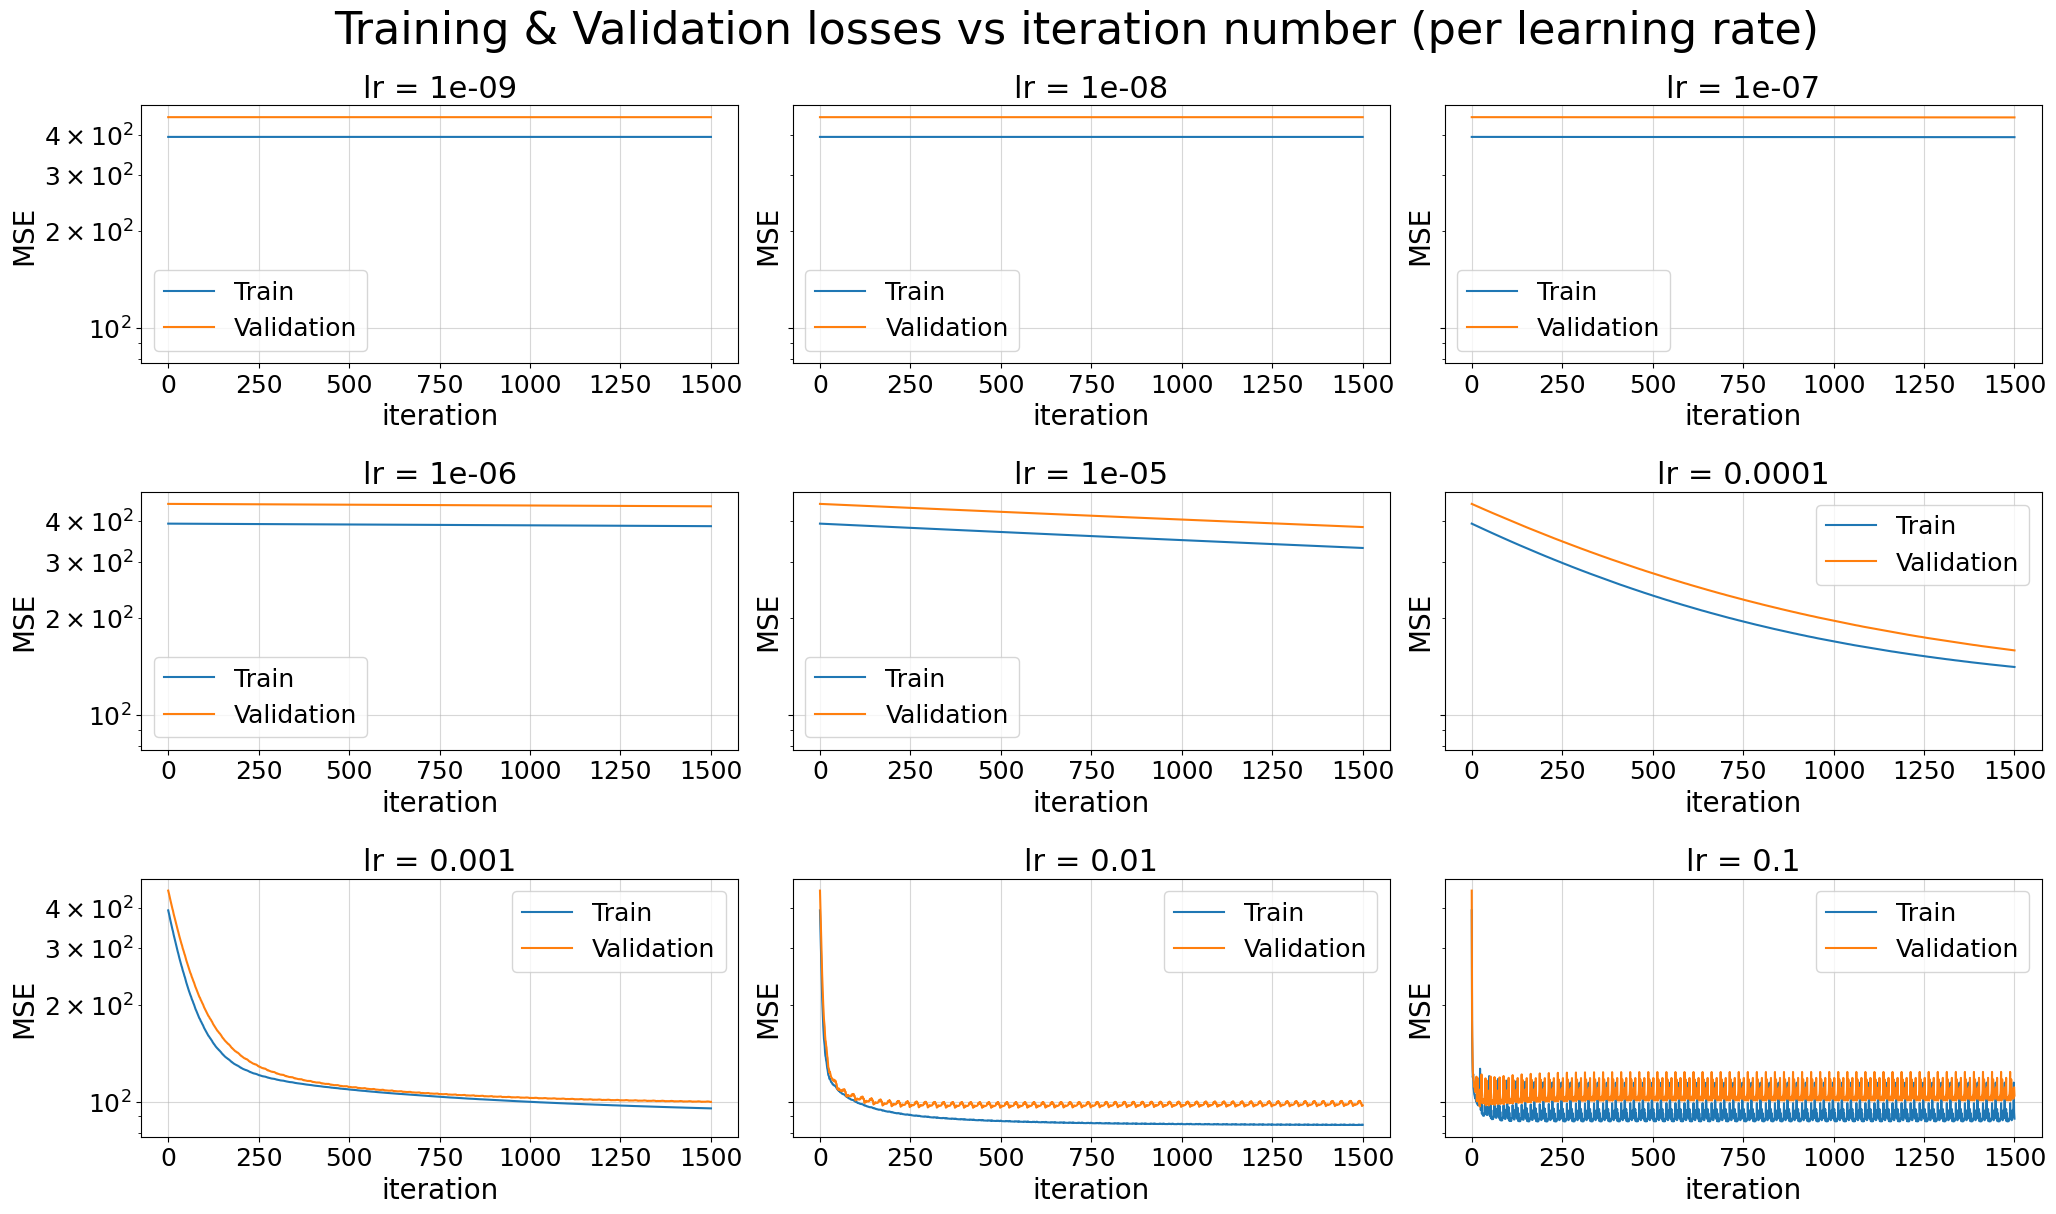

In [ ]:
# Q3
new_X_val = new_val.drop(['contamination_level'], axis=1)
new_X_val = new_X_val.to_numpy()
new_Y_val = new_val['contamination_level']
new_Y_val = new_Y_val.to_numpy()
test_lr(new_X_train, new_Y_train, new_X_val, new_Y_val, title='Training & Validation losses vs iteration number (per learning rate)')

In [ ]:
# Q4
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate

train_df_X = train_df_prepared.drop(['contamination_level'], axis=1).copy()
train_df_Y = train_df_prepared['contamination_level'].copy()

dummy = DummyRegressor(strategy="mean")
cv_results = cross_validate(dummy, train_df_X, train_df_Y, cv=5, return_train_score=True, scoring="neg_mean_squared_error")
mean_train_score = np.mean(cv_results['train_score'])
mean_val_score = np.mean(cv_results['test_score'])

print(f"Train MSE: {mean_train_score}")
print(f"Validation MSE: {mean_val_score}")

Train MSE: -101.62434266383735
Validation MSE: -101.79089722218836


In [ ]:
# Post Q4
dummy_all_train = DummyRegressor(strategy="mean").fit(train_df_X, train_df_Y)

<ipython-input-6-9e0ac99cc7de>:103: RuntimeWarning: invalid value encountered in double_scalars
  self.b = self.b - (g_b * self.lr)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File

The index of the best validation accuracy is: 5
The lr for the best validation accuracy is: 0.023713737056616554
The best validation accuracy is: -92.02596954468278
The training accuracy for the best validation accuracy is: -86.52343670498388


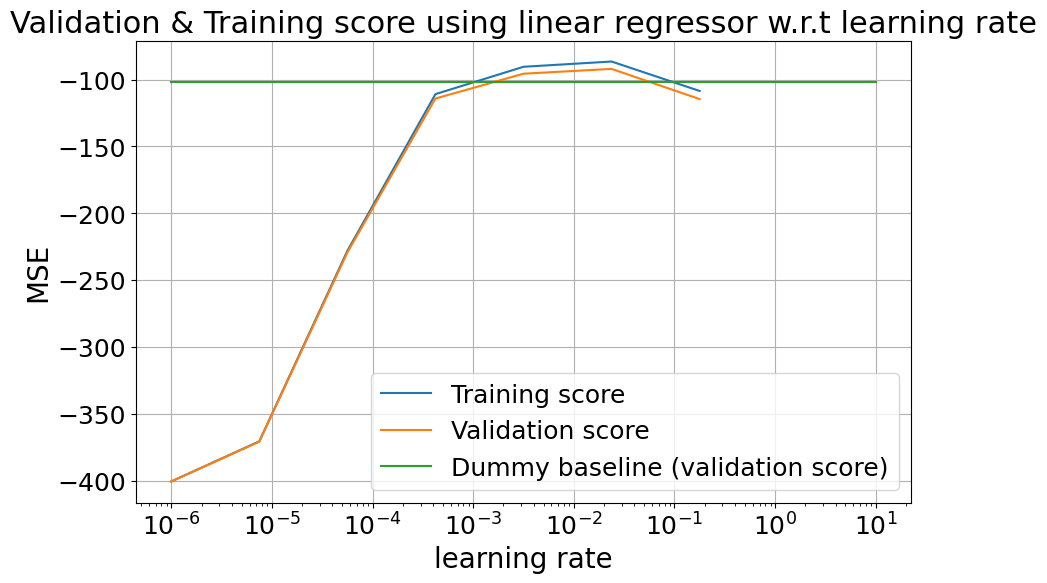

In [ ]:
# Q5
# i. Suitable values of learning rate
learning_rates = np.logspace(-6,1,9)

mean_training_accs = []
validation_accs = []
dummy_validation_accs = []

# ii. Evaluate the regressor for each learning rate
for lr in learning_rates:
  cv_results = cross_validate(LinearRegressor(lr=lr), train_df_X, train_df_Y, cv=5, return_train_score=True, scoring="neg_mean_squared_error")
  cv_dummy_results = cross_validate(dummy_all_train, train_df_X, train_df_Y, cv=5, return_train_score=True, scoring="neg_mean_squared_error")
  mean_train_score = np.mean(cv_results['train_score'])
  mean_val_score = np.mean(cv_results['test_score'])
  mean_dummy_validation_score = np.mean(cv_dummy_results['test_score'])
  mean_training_accs.append(mean_train_score)
  validation_accs.append(mean_val_score)
  dummy_validation_accs.append(mean_dummy_validation_score)

# iii. Plotting the results and creating the graph
plt.figure(figsize=(10, 6))
plt.semilogx(learning_rates, mean_training_accs, label='Training score')
plt.semilogx(learning_rates, validation_accs, label='Validation score')
plt.semilogx(learning_rates, dummy_validation_accs, label='Dummy baseline (validation score)')
plt.xlabel('learning rate')
plt.ylabel('MSE')
plt.title('Validation & Training score using linear regressor w.r.t learning rate')
plt.legend()
plt.grid(True)

max_index = validation_accs.index(max(validation_accs))
# iv. Report the learning rate that yields the optimal validation error & its respective error
print("The index of the best validation accuracy is:", max_index)
print("The lr for the best validation accuracy is:", learning_rates[max_index])
print("The best validation accuracy is:", validation_accs[max_index])
print("The training accuracy for the best validation accuracy is:", mean_training_accs[max_index])

In [ ]:
# Post Q6
linear_all_train = LinearRegressor(lr=0.023).fit(train_df_X,train_df_Y)

The index of the best validation accuracy is: 96
The lambda for the best validation accuracy is: 97
The best validation accuracy is: -91.06142270391197
The training accuracy for the best validation accuracy is: -86.79712802865349


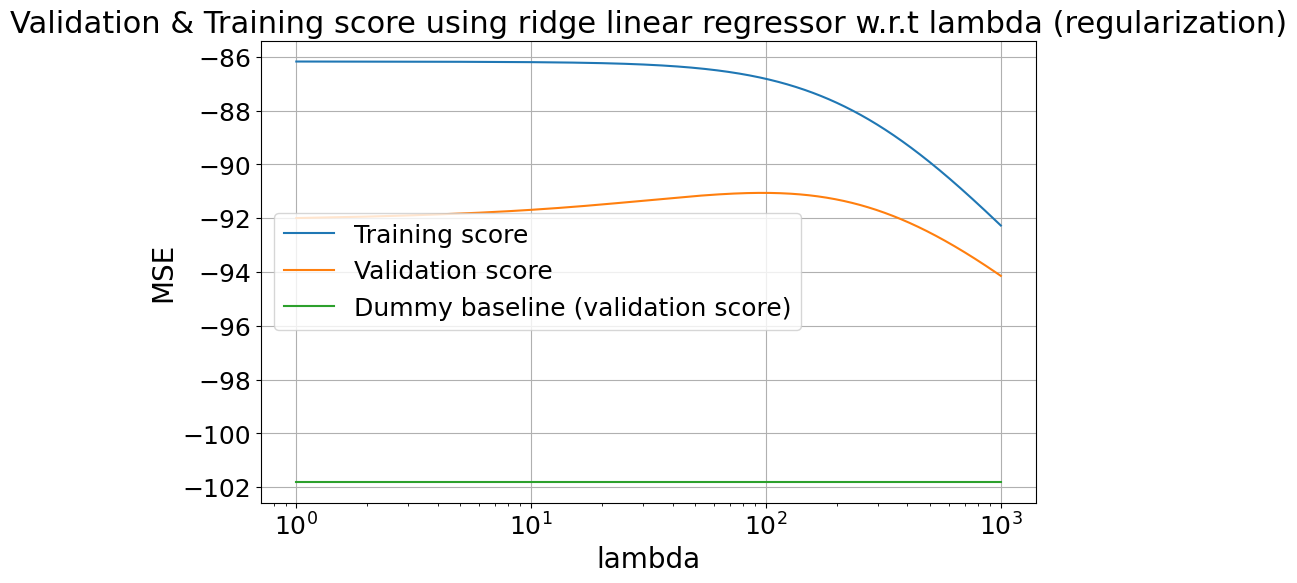

In [ ]:
# Q7
from sklearn.linear_model import Ridge
# i. Suitable values of learning rate
lambdas = list(range(1, 1000, 1))

mean_training_accs = []
validation_accs = []
dummy_validation_accs = []

# ii. Evaluate the regressor for each learning rate
for lambda_i in lambdas:
  ridge_regressor = Ridge(alpha=lambda_i, fit_intercept=True)
  cv_results = cross_validate(ridge_regressor, train_df_X, train_df_Y, cv=5, return_train_score=True, scoring="neg_mean_squared_error")
  cv_dummy_results = cross_validate(dummy_all_train, train_df_X, train_df_Y, cv=5, return_train_score=True, scoring="neg_mean_squared_error")
  mean_train_score = np.mean(cv_results['train_score'])
  mean_val_score = np.mean(cv_results['test_score'])
  mean_dummy_validation_score = np.mean(cv_dummy_results['test_score'])
  mean_training_accs.append(mean_train_score)
  validation_accs.append(mean_val_score)
  dummy_validation_accs.append(mean_dummy_validation_score)

# iii. Plotting the results and creating the graph
plt.figure(figsize=(10, 6))
plt.semilogx(lambdas, mean_training_accs, label='Training score')
plt.semilogx(lambdas, validation_accs, label='Validation score')
plt.semilogx(lambdas, dummy_validation_accs, label='Dummy baseline (validation score)')
plt.xlabel('lambda')
plt.ylabel('MSE')
plt.title('Validation & Training score using ridge linear regressor w.r.t lambda (regularization)')
plt.legend()
plt.grid(True)

max_index = validation_accs.index(max(validation_accs))
# iv. Report the learning rate that yields the optimal validation error & its respective error
print("The index of the best validation accuracy is:", max_index)
print("The lambda for the best validation accuracy is:", lambdas[max_index])
print("The best validation accuracy is:", validation_accs[max_index])
print("The training accuracy for the best validation accuracy is:", mean_training_accs[max_index])

In [ ]:
# Post Q8
ridge_regressor_all_train = Ridge(alpha=97, fit_intercept=True).fit(train_df_X,train_df_Y)

In [ ]:
# Q9
ridge_linear_coeff = pd.DataFrame(ridge_regressor_all_train.coef_, train_df_X.columns, columns=['Coefficients'])
ridge_linear_coeff_abs = ridge_linear_coeff.abs()
ridge_linear_coeff_abs = ridge_linear_coeff_abs.sort_values('Coefficients', ascending=False)
ridge_linear_coeff_abs

,Coefficients
PCR_01,2.871093
sugar_levels,2.404699
sport_activity,0.779271
PCR_07,0.600832
PCR_05,0.570708
PCR_06,0.552262
pcr_date_timestamp,0.414588
PCR_03,0.371325
coordinate_X,0.349995
PCR_04,0.346727


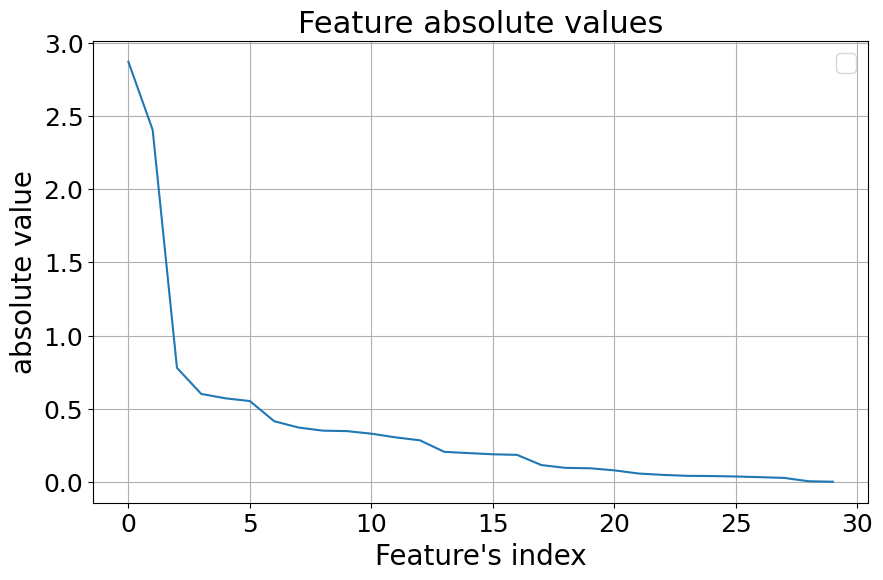

In [ ]:
# Q10
plt.figure(figsize=(10, 6))
plt.plot(range(0,len(ridge_linear_coeff_abs)), ridge_linear_coeff_abs)
plt.xlabel('Feature\'s index')
plt.ylabel('absolute value')
plt.title('Feature absolute values')
plt.legend()
plt.grid(True)

In [ ]:
# Q14
s4_df = train_df_prepared[['PCR_01','PCR_05','contamination_level']].copy()
s4_df_X = s4_df[['PCR_01','PCR_05']].copy()
s4_df_y = s4_df[['contamination_level']].copy()

In [ ]:
def plot3d(df, colX:str, colY:str, colZ:str, title:str, predictions=None):
  fig = plt.figure(figsize=(20, 7))
  axes = [fig.add_subplot(1, 3, i+1, projection='3d') for i in range(3)]

  palette = sns.color_palette("hls", 2)

  for i,ax in enumerate(axes):
    if predictions is not None:
      ax.scatter3D(df[colX], df[colY], predictions, color=palette[1], s=3)
      ax.scatter3D(df[colX], df[colY], df[colZ], color=palette[0], s=1,
                   alpha=0.35, depthshade=False)
    else:
      ax.scatter3D(df[colX], df[colY], df[colZ], color=palette[0], s=1)

    ax.set_xlabel(colX)
    ax.set_ylabel(colY)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])

    ax.view_init(elev=5., azim=45*i)

  axes[0].set_zlabel("\n" + colZ, linespacing=2.2)

  plt.suptitle(title, fontsize=32)
  plt.tight_layout()
  plt.show()

<ipython-input-20-8d1e5cb89966>:25: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


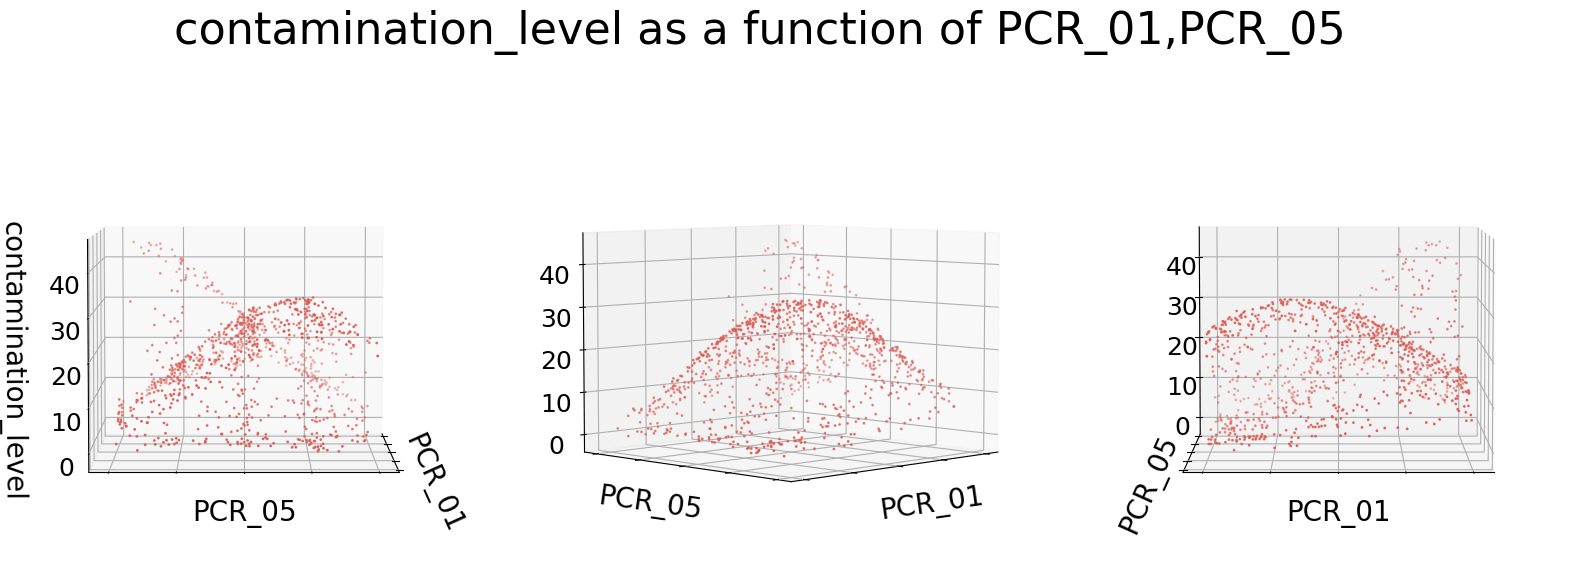

In [ ]:
plot3d(s4_df,'PCR_01','PCR_05','contamination_level',"contamination_level as a function of PCR_01,PCR_05")

The index of the best validation accuracy is: 12
The lambda for the best validation accuracy is: 13
The best validation accuracy is: -97.32797082865561
The training accuracy for the best validation accuracy is: -96.74836819261523


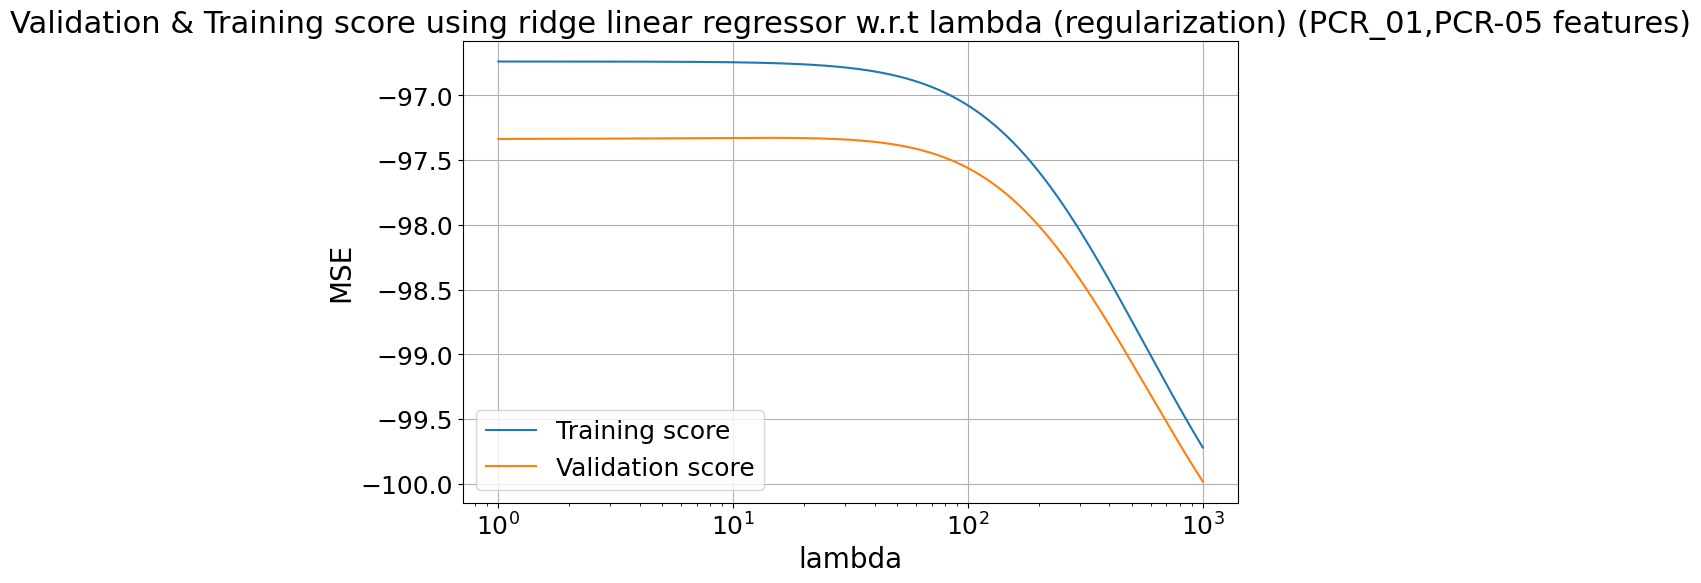

In [ ]:
# Q15
# i. Suitable values of learning rate
lambdas = list(range(1, 1000, 1))

mean_training_accs = []
validation_accs = []

# ii. Evaluate the regressor for each learning rate
for lambda_i in lambdas:
  ridge_regressor = Ridge(alpha=lambda_i, fit_intercept=True)
  cv_results = cross_validate(ridge_regressor, s4_df_X, s4_df_y, cv=5, return_train_score=True, scoring="neg_mean_squared_error")
  mean_train_score = np.mean(cv_results['train_score'])
  mean_val_score = np.mean(cv_results['test_score'])
  mean_training_accs.append(mean_train_score)
  validation_accs.append(mean_val_score)

# iii. Plotting the results and creating the graph
plt.figure(figsize=(10, 6))
plt.semilogx(lambdas, mean_training_accs, label='Training score')
plt.semilogx(lambdas, validation_accs, label='Validation score')
plt.xlabel('lambda')
plt.ylabel('MSE')
plt.title('Validation & Training score using ridge linear regressor w.r.t lambda (regularization) (PCR_01,PCR-05 features)')
plt.legend()
plt.grid(True)

max_index = validation_accs.index(max(validation_accs))
# iv. Report the learning rate that yields the optimal validation error & its respective error
print("The index of the best validation accuracy is:", max_index)
print("The lambda for the best validation accuracy is:", lambdas[max_index])
print("The best validation accuracy is:", validation_accs[max_index])
print("The training accuracy for the best validation accuracy is:", mean_training_accs[max_index])

In [ ]:
# Post Q15
ridge_regressor_all_train_s4 = Ridge(alpha=13, fit_intercept=True).fit(s4_df_X,s4_df_y)

<ipython-input-20-8d1e5cb89966>:25: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


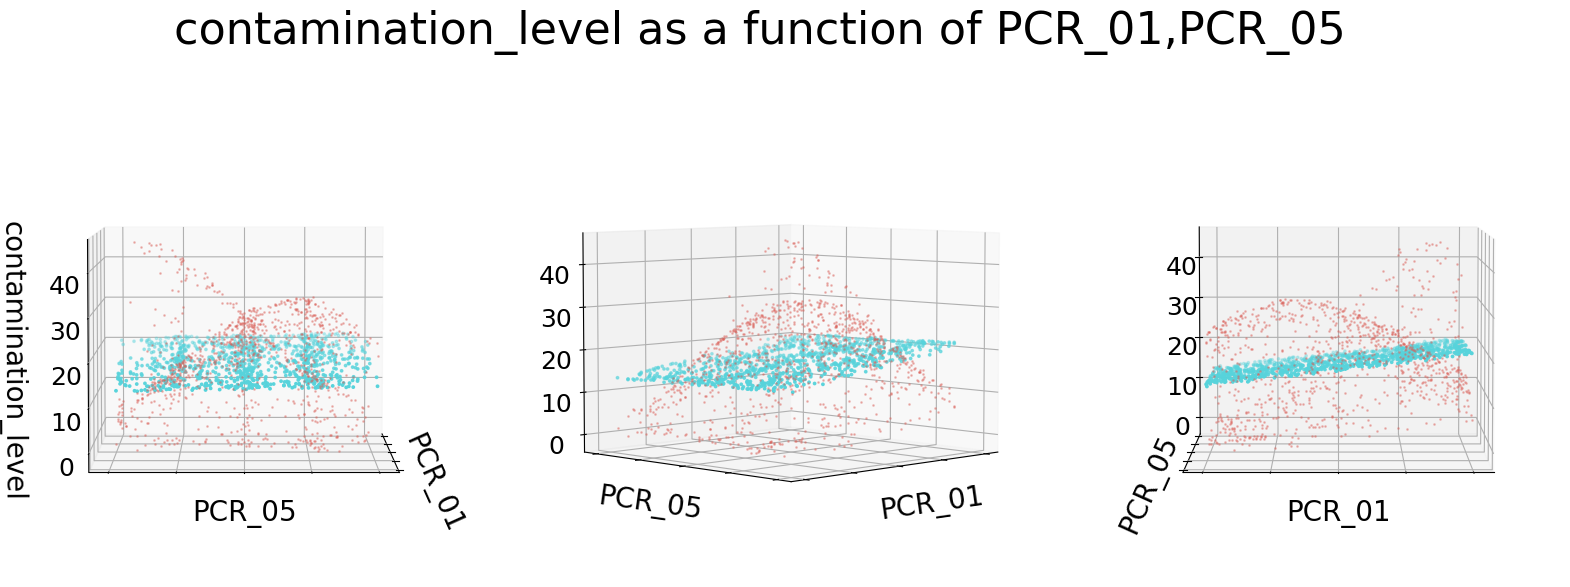

In [ ]:
# Q16
plot3d(s4_df,'PCR_01','PCR_05','contamination_level',"contamination_level as a function of PCR_01,PCR_05",
       ridge_regressor_all_train_s4.predict(s4_df_X))

In [ ]:
# Pre Q17
# i. transform the original features into 3rd-degree polynomial features
# ii. normalize the transformed features
# iii. train the linear Ridge regressor on these normalized features

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

poly_reg = Pipeline([('feature_mapping', PolynomialFeatures(degree=3)),
                      ('normalization', MinMaxScaler()),('Ridge', Ridge(alpha=13, fit_intercept=True))])

The index of the best validation accuracy is: 0
The lambda for the best validation accuracy is: 1
The best validation accuracy is: -80.94488615430527
The training accuracy for the best validation accuracy is: -96.73876312751786


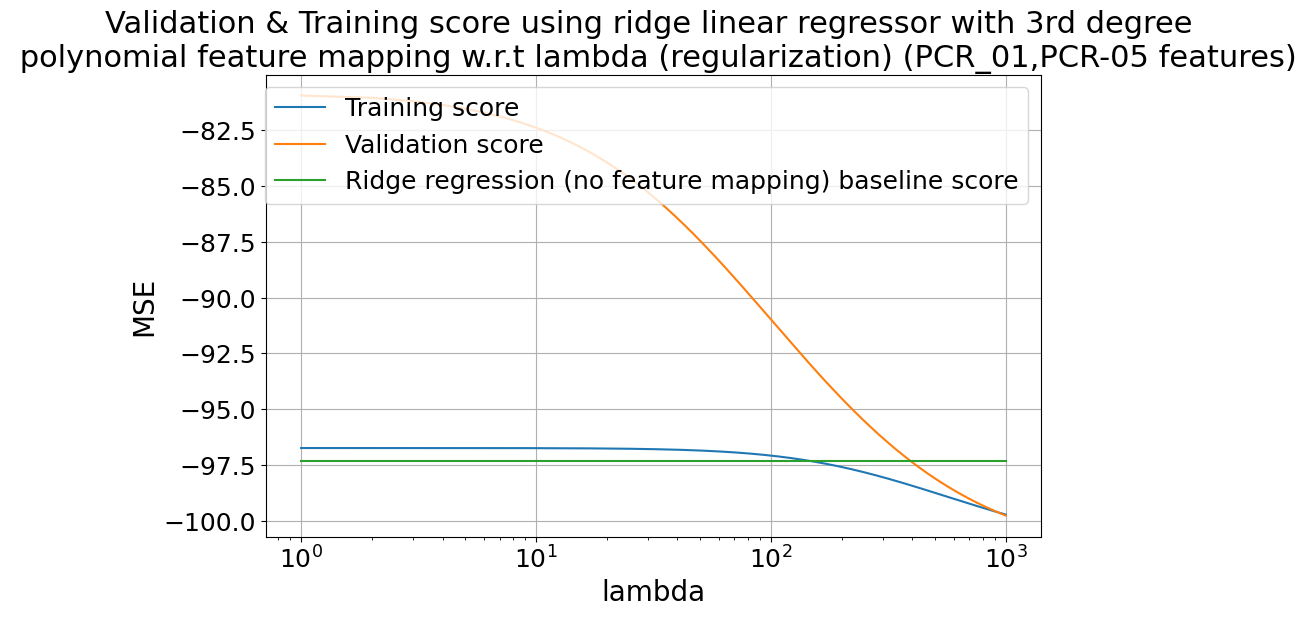

In [ ]:
# Q18
lambdas = list(range(1, 1000, 1))

training_accs = []
validation_accs = []
validation_baseline_accs = []

# ii. Evaluate the regressor for each learning rate
for lambda_i in lambdas:
  poly_reg_i = poly_reg.set_params(Ridge__alpha=lambda_i)
  cv_results = cross_validate(poly_reg_i, s4_df_X, s4_df_y, cv=5, return_train_score=True, scoring="neg_mean_squared_error")
  cv_results_baseline = cross_validate(ridge_regressor_all_train_s4, s4_df_X, s4_df_y, cv=5, return_train_score=True, scoring="neg_mean_squared_error")
  mean_train_score = np.mean(cv_results['train_score'])
  mean_val_score = np.mean(cv_results['test_score'])
  mean_val_score_baseline = np.mean(cv_results_baseline['test_score'])
  training_accs.append(mean_train_score)
  validation_accs.append(mean_val_score)
  validation_baseline_accs.append(mean_val_score_baseline)

# iii. Plotting the results and creating the graph
plt.figure(figsize=(10, 6))
plt.semilogx(lambdas, mean_training_accs, label='Training score')
plt.semilogx(lambdas, validation_accs, label='Validation score')
plt.semilogx(lambdas, validation_baseline_accs, label='Ridge regression (no feature mapping) baseline score')
plt.xlabel('lambda')
plt.ylabel('MSE')
plt.title('Validation & Training score using ridge linear regressor with 3rd degree \n polynomial feature mapping w.r.t lambda (regularization) (PCR_01,PCR-05 features)')
plt.legend()
plt.grid(True)

max_index = validation_accs.index(max(validation_accs))
# iv. Report the learning rate that yields the optimal validation error & its respective error
print("The index of the best validation accuracy is:", max_index)
print("The lambda for the best validation accuracy is:", lambdas[max_index])
print("The best validation accuracy is:", validation_accs[max_index])
print("The training accuracy for the best validation accuracy is:", mean_training_accs[max_index])

In [ ]:
# Post Q18
poly_reg_all_train_s4 = poly_reg.set_params(Ridge__alpha=1)
poly_reg_all_train_s4.fit(s4_df_X,s4_df_y)

Pipeline(steps=[('feature_mapping', PolynomialFeatures(degree=3)),
                ('normalization', MinMaxScaler()), ('Ridge', Ridge(alpha=1))])

<ipython-input-20-8d1e5cb89966>:25: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


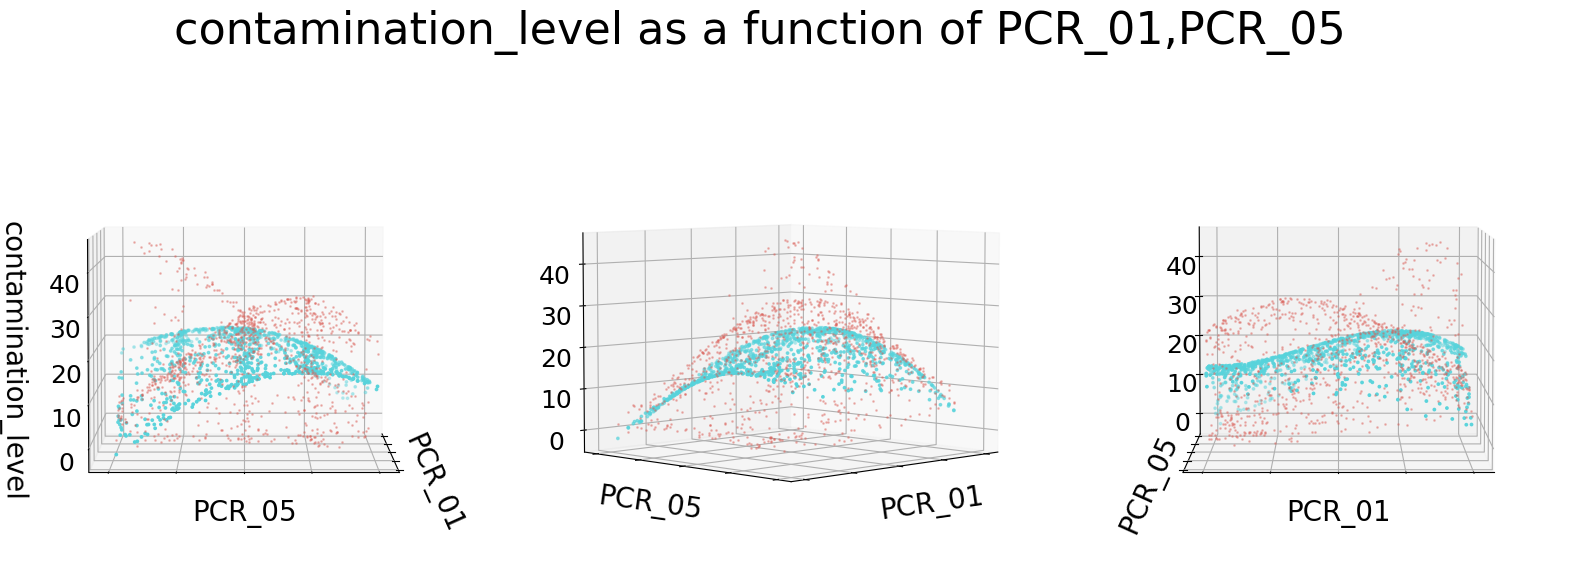

In [ ]:
# Q19
plot3d(s4_df,'PCR_01','PCR_05','contamination_level',"contamination_level as a function of PCR_01,PCR_05",
       poly_reg_all_train_s4.predict(s4_df_X))

In [ ]:
# Task before Q21
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

#Creating the train databse
s5_df_train = train_df_prepared[['PCR_01','PCR_02','PCR_03','PCR_04','PCR_05','PCR_09','PCR_10',
                           'sugar_levels','sport_activity','contamination_level']].copy()
s5_df_X_train = s5_df_train[['PCR_01','PCR_02','PCR_03','PCR_04','PCR_05','PCR_09','PCR_10',
                           'sugar_levels','sport_activity']].copy()
s5_df_y_train = s5_df_train[['contamination_level']].copy()

#Training the GBM model
gbm = GradientBoostingRegressor()
gbm.fit(s5_df_X_train, s5_df_y_train)

#Creating the test database
s5_df_test = test_df_prepared[['PCR_01','PCR_02','PCR_03','PCR_04','PCR_05','PCR_09','PCR_10',
                           'sugar_levels','sport_activity','contamination_level']].copy()
s5_df_X_test = s5_df_test[['PCR_01','PCR_02','PCR_03','PCR_04','PCR_05','PCR_09','PCR_10',
                           'sugar_levels','sport_activity']].copy()
s5_df_y_test = s5_df_test[['contamination_level']].copy()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
losses = ['squared_error','absolute_error','huber','quantile']
learning_rates = np.logspace(-4,0,5)
subsamples = np.arange(0.1,1.1,0.1)
min_samples_leaf = np.arange(5,50,5)
hyperparameters = {"loss": losses, "learning_rate": learning_rates,
                   "subsample": subsamples , "min_samples_leaf": min_samples_leaf}

In [ ]:
# Q23
from sklearn.model_selection import GridSearchCV

# Creating the hyperparameter dict for running the CV
losses = ['squared_error','absolute_error','huber','quantile']
learning_rates = np.logspace(-4,0,5)
subsamples = np.arange(0.1,1.1,0.1)
min_samples_leaf = np.arange(5,50,5)
hyperparameters = {"loss": losses, "learning_rate": learning_rates,
                   "subsample": subsamples , "min_samples_leaf": min_samples_leaf}

# 8-fold cross validation for the hyperparamters: loss, learning_rates, subsamples, min_sample_leafs
gbm_for_grid = GradientBoostingRegressor()
grid = GridSearchCV(gbm_for_grid, hyperparameters, cv=8, scoring='neg_mean_squared_error', return_train_score=True)
grid.fit(s5_df_X_train,s5_df_y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

KeyboardInterrupt: ignored

In [ ]:
cv_results_.to_csv('./cv_results_Q23.csv')

NameError: ignored

In [ ]:
gbm_opt_loss = "huber"
gbm_opt_subsample = 0.5
gbm_opt_min_samples_leaf = 5
gbm_opt_learning_rate = 0.1

In [ ]:
cv_results_from_df = pd.read_csv("./cv_results_Q23.csv")

In [ ]:
# Obtain the results from GridSearchCV
train_accuracy = np.array(cv_results_from_df['mean_train_score']).reshape(len(hyperparameters["loss"]),
                 len(hyperparameters["learning_rate"]), len(hyperparameters["subsample"]),
                 len(hyperparameters["min_samples_leaf"]))
validation_accuracy = np.array(cv_results_from_df['mean_test_score']).reshape(len(hyperparameters["loss"]),
                 len(hyperparameters["learning_rate"]), len(hyperparameters["subsample"]),
                 len(hyperparameters["min_samples_leaf"]))

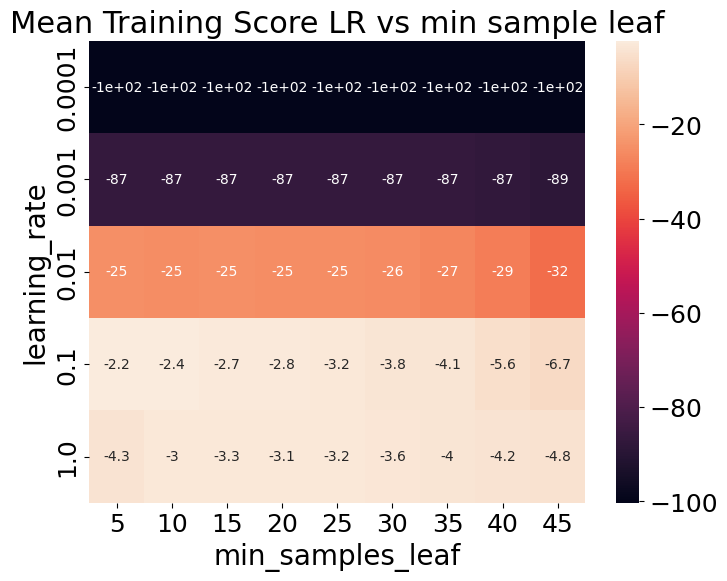

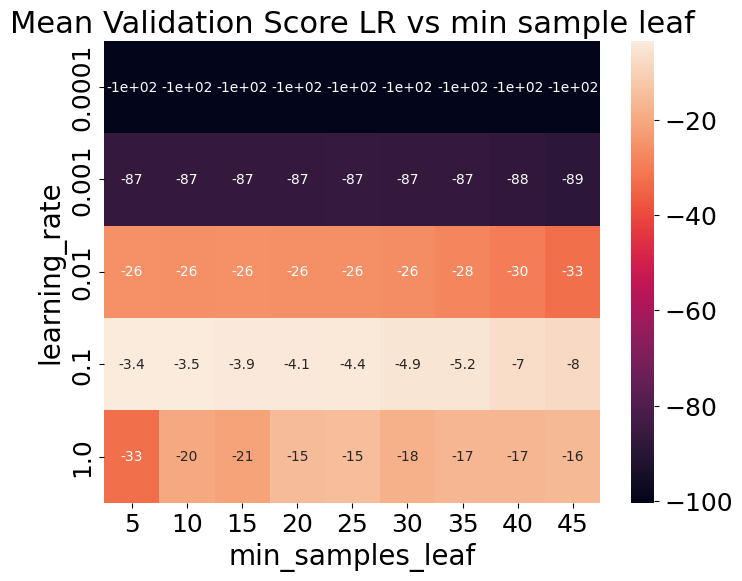

In [ ]:
# Q23 - heatmap of learning_rate - min_samples_leaf

filtered_1_train = cv_results_from_df[(cv_results_from_df['param_loss'] == gbm_opt_loss) & (cv_results_from_df['param_subsample'] == gbm_opt_subsample)]
heatmap_data_1_train = filtered_1_train.pivot_table(index='param_learning_rate', columns='param_min_samples_leaf', values='mean_train_score')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_1_train, annot=True, xticklabels=hyperparameters['min_samples_leaf'], yticklabels=hyperparameters['learning_rate'], annot_kws={"size": 10})
plt.title('Mean Training Score LR vs min sample leaf')
plt.ylabel('learning_rate')
plt.xlabel('min_samples_leaf')
plt.show()

filtered_1_val = cv_results_from_df[(cv_results_from_df['param_loss'] == gbm_opt_loss) & (cv_results_from_df['param_subsample'] == gbm_opt_subsample)]
heatmap_data_1_val = filtered_1_val.pivot_table(index='param_learning_rate', columns='param_min_samples_leaf', values='mean_test_score')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_1_val, annot=True, xticklabels=hyperparameters['min_samples_leaf'], yticklabels=hyperparameters['learning_rate'], annot_kws={"size": 10})
plt.title('Mean Validation Score LR vs min sample leaf')
plt.ylabel('learning_rate')
plt.xlabel('min_samples_leaf')
plt.show()

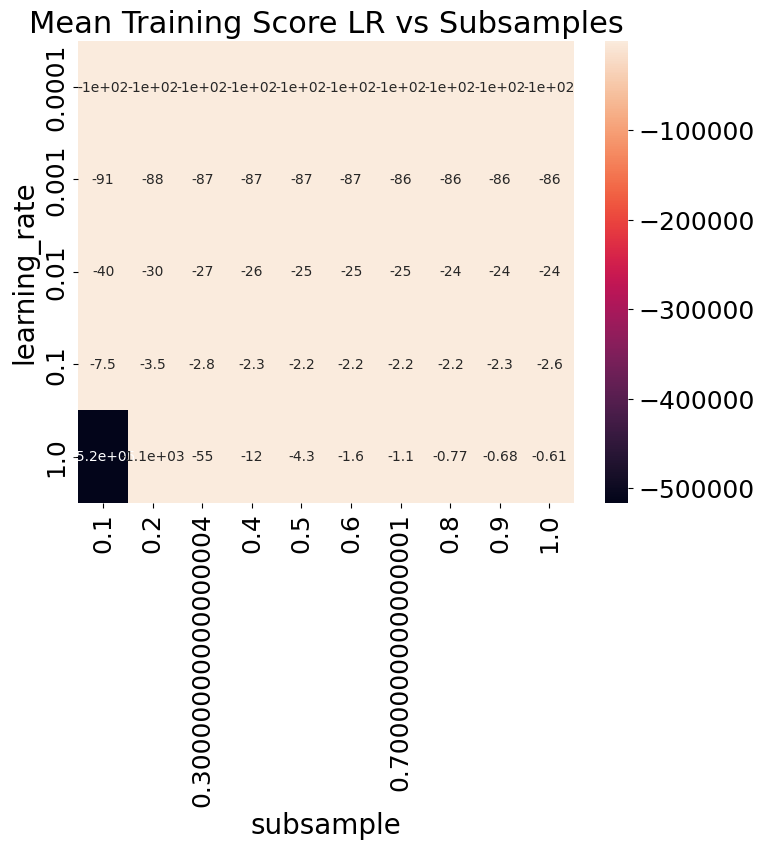

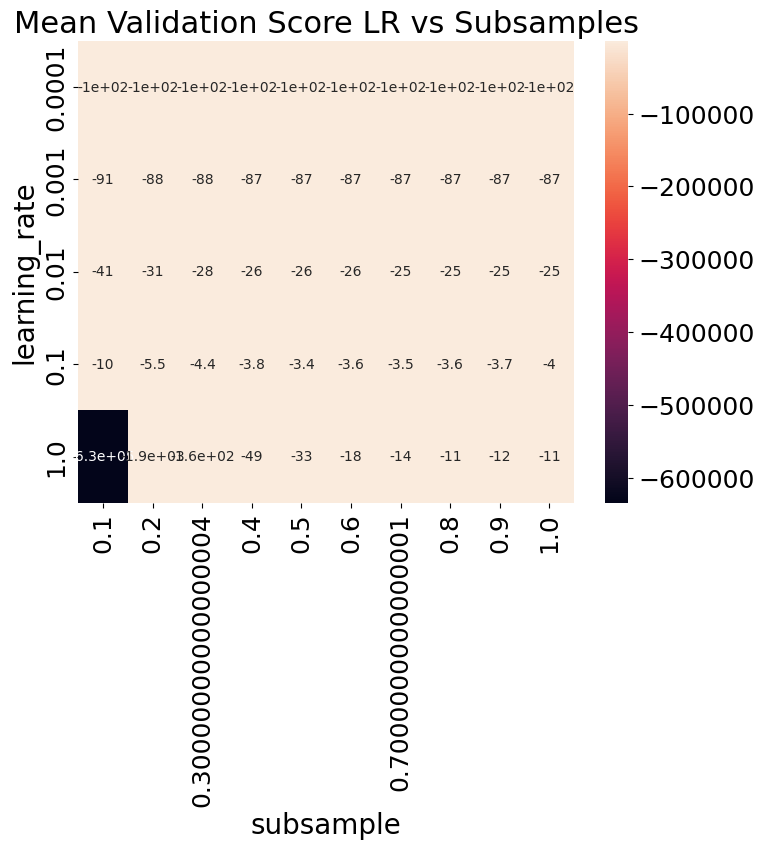

In [ ]:
# Q23 - heatmap of learning_rate - subsample

filtered_2_train = cv_results_from_df[(cv_results_from_df['param_loss'] == gbm_opt_loss) & (cv_results_from_df['param_min_samples_leaf'] == gbm_opt_min_samples_leaf)]
heatmap_data_2_train = filtered_2_train.pivot_table(index='param_learning_rate', columns='param_subsample', values='mean_train_score')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_2_train, annot=True, xticklabels=hyperparameters['subsample'], yticklabels=hyperparameters['learning_rate'], annot_kws={"size": 10})
plt.title('Mean Training Score LR vs Subsamples')
plt.ylabel('learning_rate')
plt.xlabel('subsample')
plt.show()

filtered_2_val = cv_results_from_df[(cv_results_from_df['param_loss'] == gbm_opt_loss) & (cv_results_from_df['param_min_samples_leaf'] == gbm_opt_min_samples_leaf)]
heatmap_data_2_val = filtered_2_val.pivot_table(index='param_learning_rate', columns='param_subsample', values='mean_test_score')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_2_val, annot=True, xticklabels=hyperparameters['subsample'], yticklabels=hyperparameters['learning_rate'], annot_kws={"size": 10})
plt.title('Mean Validation Score LR vs Subsamples')
plt.ylabel('learning_rate')
plt.xlabel('subsample')
plt.show()

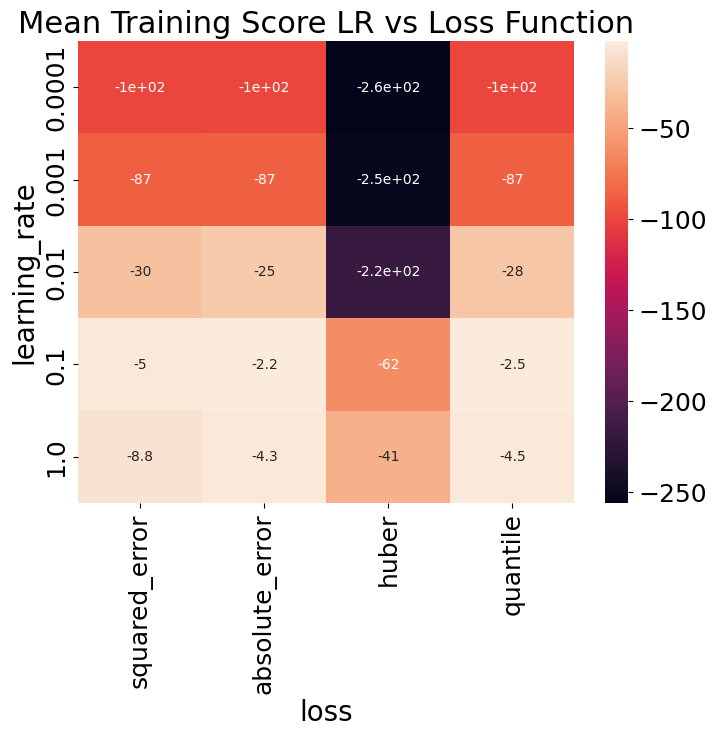

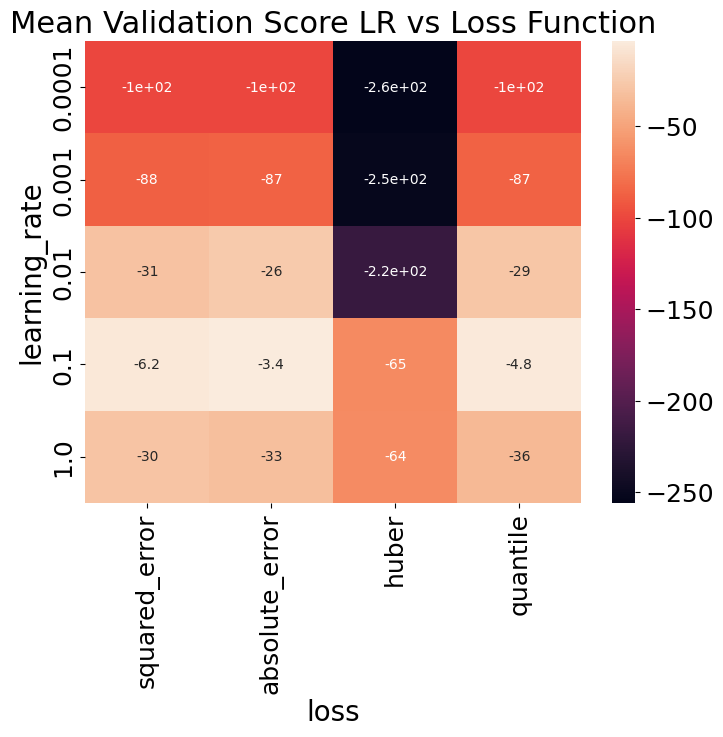

In [ ]:
# Q23 - heatmap of learning_rate - loss

filtered_3_train = cv_results_from_df[(cv_results_from_df['param_subsample'] == gbm_opt_subsample) & (cv_results_from_df['param_min_samples_leaf'] == gbm_opt_min_samples_leaf)]
heatmap_data_3_train = filtered_3_train.pivot_table(index='param_learning_rate', columns='param_loss', values='mean_train_score')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_3_train, annot=True, xticklabels=hyperparameters['loss'], yticklabels=hyperparameters['learning_rate'], annot_kws={"size": 10})
plt.title('Mean Training Score LR vs Loss Function')
plt.ylabel('learning_rate')
plt.xlabel('loss')
plt.show()

filtered_3_val = cv_results_from_df[(cv_results_from_df['param_subsample'] == gbm_opt_subsample) & (cv_results_from_df['param_min_samples_leaf'] == gbm_opt_min_samples_leaf)]
heatmap_data_3_val = filtered_3_val.pivot_table(index='param_learning_rate', columns='param_loss', values='mean_test_score')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_3_val, annot=True, xticklabels=hyperparameters['loss'], yticklabels=hyperparameters['learning_rate'], annot_kws={"size": 10})
plt.title('Mean Validation Score LR vs Loss Function')
plt.ylabel('learning_rate')
plt.xlabel('loss')
plt.show()

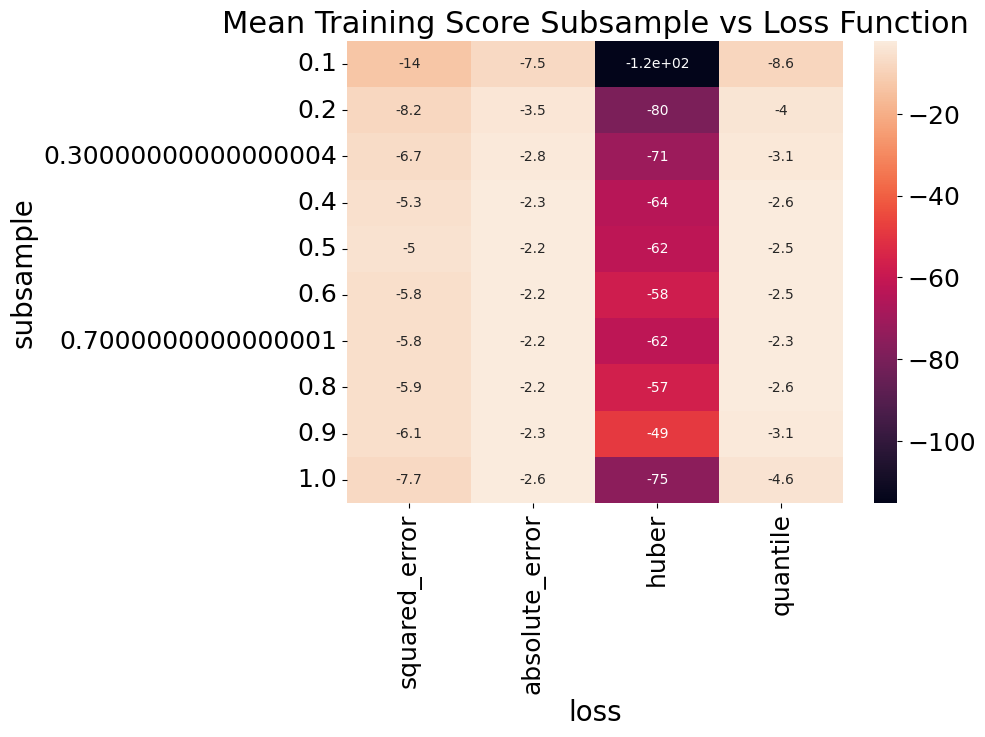

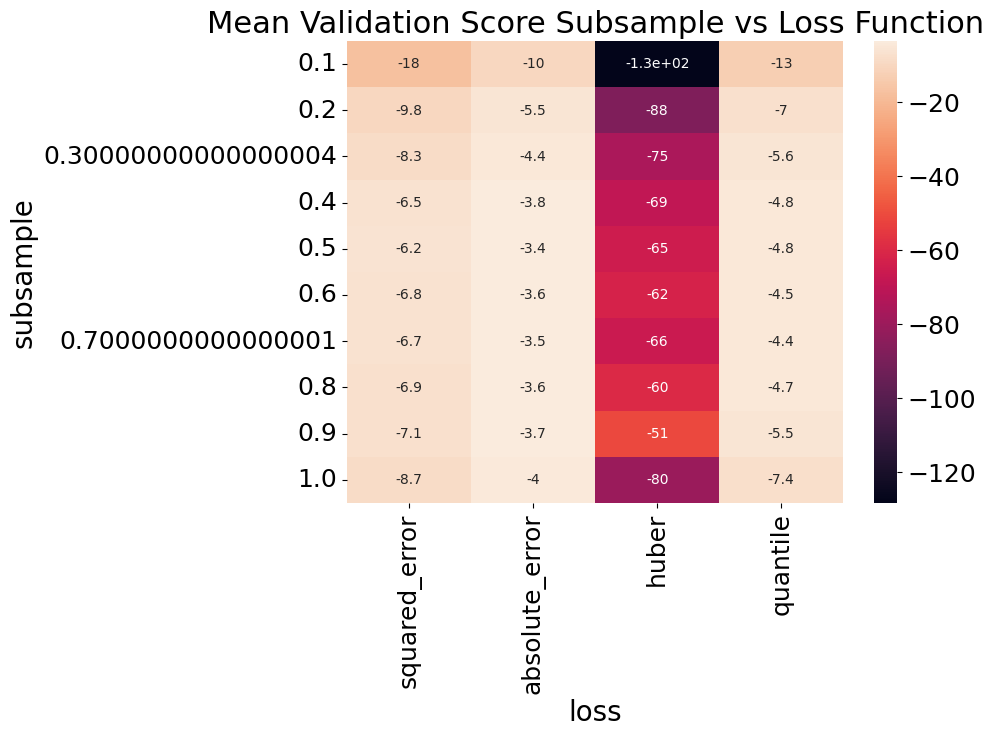

In [ ]:
# Q23 - heatmap of subsample - loss

filtered_4_train = cv_results_from_df[(cv_results_from_df['param_learning_rate'] == gbm_opt_learning_rate) & (cv_results_from_df['param_min_samples_leaf'] == gbm_opt_min_samples_leaf)]
heatmap_data_4_train = filtered_4_train.pivot_table(index='param_subsample', columns='param_loss', values='mean_train_score')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_4_train, annot=True, xticklabels=hyperparameters['loss'], yticklabels=hyperparameters['subsample'], annot_kws={"size": 10})
plt.title('Mean Training Score Subsample vs Loss Function')
plt.ylabel('subsample')
plt.xlabel('loss')
plt.show()

filtered_4_val = cv_results_from_df[(cv_results_from_df['param_learning_rate'] == gbm_opt_learning_rate) & (cv_results_from_df['param_min_samples_leaf'] == gbm_opt_min_samples_leaf)]
heatmap_data_4_val = filtered_4_val.pivot_table(index='param_subsample', columns='param_loss', values='mean_test_score')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_4_val, annot=True, xticklabels=hyperparameters['loss'], yticklabels=hyperparameters['subsample'], annot_kws={"size": 10})
plt.title('Mean Validation Score Subsample vs Loss Function')
plt.ylabel('subsample')
plt.xlabel('loss')
plt.show()

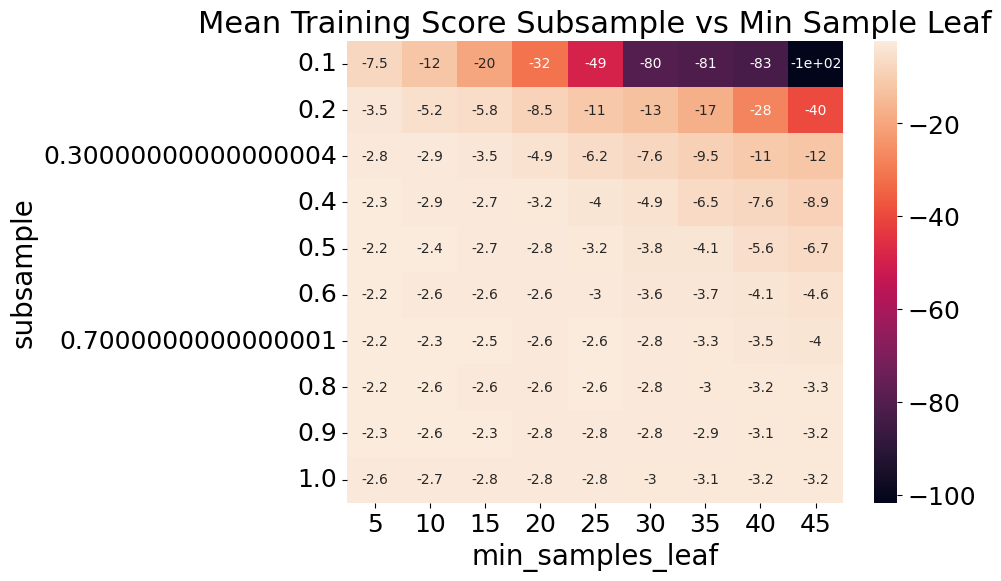

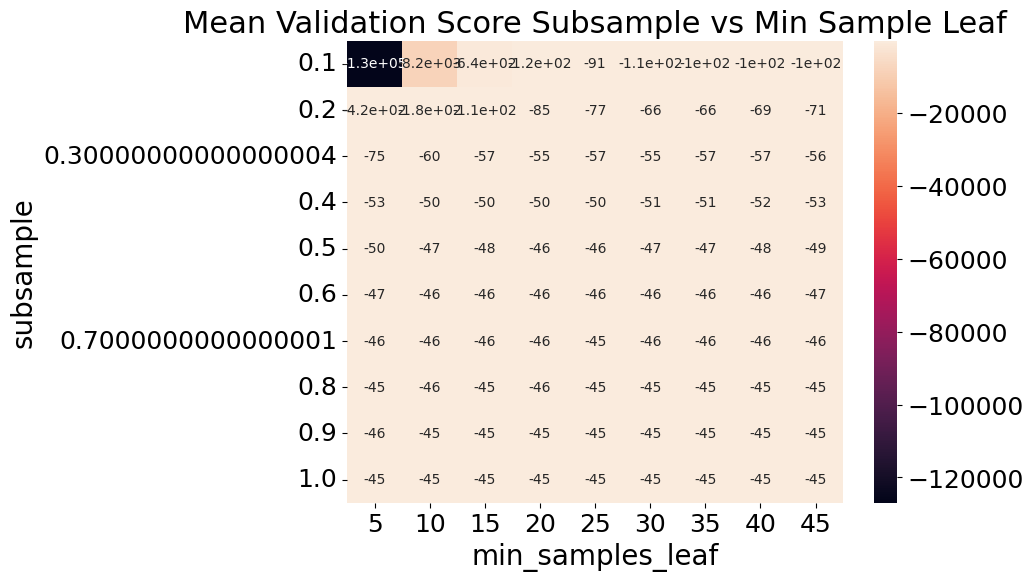

In [ ]:
# Q23 - heatmap of subsample - min_samples_leaf

filtered_5_train = cv_results_from_df[(cv_results_from_df['param_learning_rate'] == gbm_opt_learning_rate) & (cv_results_from_df['param_loss'] == gbm_opt_loss)]
heatmap_data_5_train = filtered_5_train.pivot_table(index='param_subsample', columns='param_min_samples_leaf', values='mean_train_score')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_5_train, annot=True, xticklabels=hyperparameters['min_samples_leaf'], yticklabels=hyperparameters['subsample'], annot_kws={"size": 10})
plt.title('Mean Training Score Subsample vs Min Sample Leaf')
plt.ylabel('subsample')
plt.xlabel('min_samples_leaf')
plt.show()

filtered_5_val = cv_results_from_df[(cv_results_from_df['param_loss'] == gbm_opt_loss) & (cv_results_from_df['param_loss'] == gbm_opt_loss)]
heatmap_data_5_val = filtered_5_val.pivot_table(index='param_subsample', columns='param_min_samples_leaf', values='mean_test_score')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_5_val, annot=True, xticklabels=hyperparameters['min_samples_leaf'], yticklabels=hyperparameters['subsample'], annot_kws={"size": 10})
plt.title('Mean Validation Score Subsample vs Min Sample Leaf')
plt.ylabel('subsample')
plt.xlabel('min_samples_leaf')
plt.show()

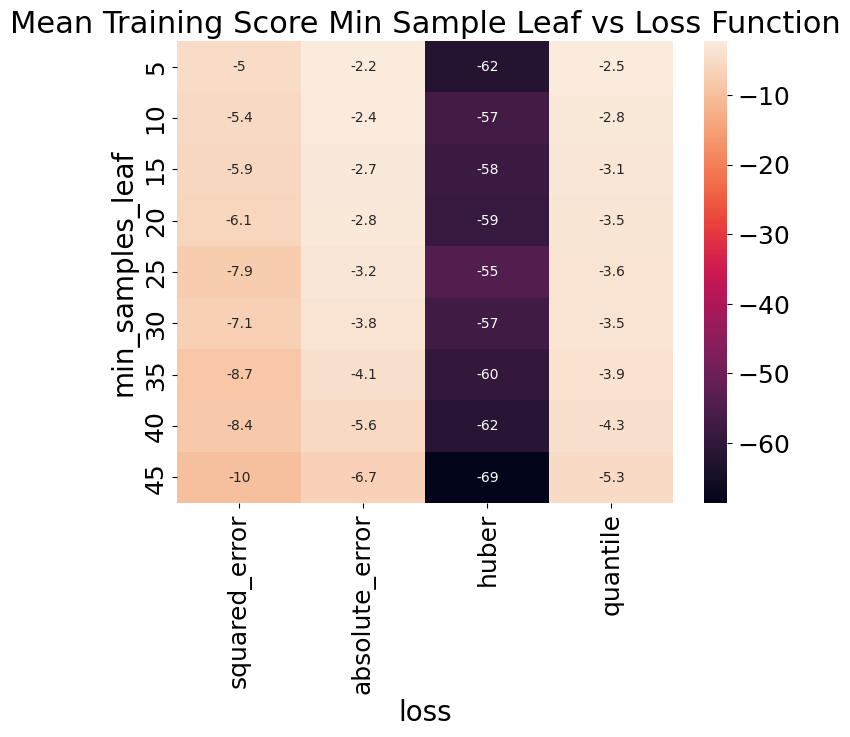

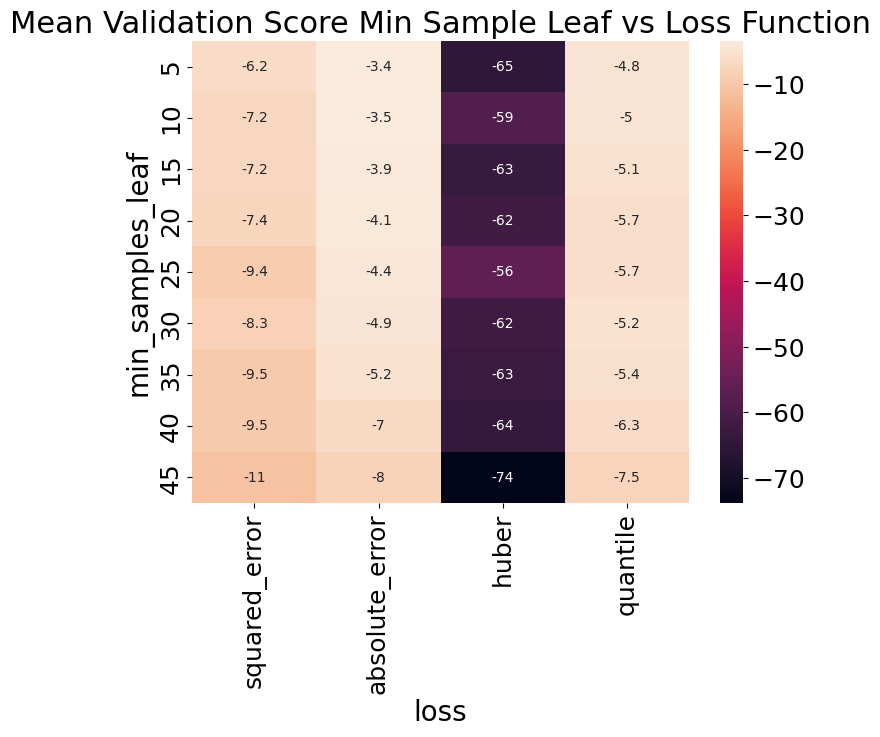

In [ ]:
# Q23 - heatmap of min_samples_leaf - loss

filtered_6_train = cv_results_from_df[(cv_results_from_df['param_learning_rate'] == gbm_opt_learning_rate) & (cv_results_from_df['param_subsample'] == gbm_opt_subsample)]
heatmap_data_6_train = filtered_6_train.pivot_table(index='param_min_samples_leaf', columns='param_loss', values='mean_train_score')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_6_train, annot=True, xticklabels=hyperparameters['loss'], yticklabels=hyperparameters['min_samples_leaf'], annot_kws={"size": 10})
plt.title('Mean Training Score Min Sample Leaf vs Loss Function')
plt.ylabel('min_samples_leaf')
plt.xlabel('loss')
plt.show()

filtered_6_val = cv_results_from_df[(cv_results_from_df['param_learning_rate'] == gbm_opt_learning_rate) & (cv_results_from_df['param_subsample'] == gbm_opt_subsample)]
heatmap_data_6_val = filtered_6_val.pivot_table(index='param_min_samples_leaf', columns='param_loss', values='mean_test_score')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_6_val, annot=True, xticklabels=hyperparameters['loss'], yticklabels=hyperparameters['min_samples_leaf'], annot_kws={"size": 10})
plt.title('Mean Validation Score Min Sample Leaf vs Loss Function')
plt.ylabel('min_samples_leaf')
plt.xlabel('loss')
plt.show()

In [ ]:
gbm_all_train = GradientBoostingRegressor(loss=gbm_opt_loss, subsample=gbm_opt_subsample, min_samples_leaf=gbm_opt_min_samples_leaf, learning_rate=gbm_opt_learning_rate)
gbm_all_train.fit(s5_df_X_train,s5_df_y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(loss='huber', min_samples_leaf=5, subsample=0.5)

In [ ]:
# Q25
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
# Q25 - dummy regressor on test
test_X_for_dummy = test_df_prepared.drop('contamination_level', axis=1).to_numpy()
test_y_for_dummy = test_df_prepared['contamination_level'].to_numpy()
y_pred_dummy = dummy_all_train.predict(test_X_for_dummy)
MSE(y_pred_dummy,test_y_for_dummy)

98.29429930745337

In [ ]:
# Q25 - linear regressor on test
text_X_for_linear = test_df_prepared.drop('contamination_level', axis=1).to_numpy()
test_y_for_linear = test_df_prepared['contamination_level'].to_numpy()
y_pred_linear = linear_all_train.predict(text_X_for_linear)
MSE(y_pred_linear,test_y_for_linear)

90.0752410363956

In [ ]:
# Q25 - ridge linear regressor on test
text_X_for_ridge_linear = test_df_prepared.drop('contamination_level', axis=1).to_numpy()
test_y_for_ridge_linear = test_df_prepared['contamination_level'].to_numpy()
y_pred_ridge_linear = ridge_regressor_all_train.predict(text_X_for_ridge_linear)
MSE(y_pred_ridge_linear,test_y_for_ridge_linear)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


89.1092930491486

In [ ]:
# Q25 - GBM regressor on test
y_pred_gbm = gbm_all_train.predict(s5_df_X_test)
MSE(y_pred_gbm,s5_df_y_test)

2.804195180540171